Строим векторную карту по усредненным векторам фильтрованной скорости по ка по 1 мыши

In [12]:
import traja
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from scipy import stats
from scipy.ndimage import gaussian_filter1d


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18252\3434105354.py:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [13]:
def openFile(ff):
    df = pd.read_csv(ff, sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
    df = df.drop('numb', axis=1)
    df = df.drop(df[df.time > 1755].index)
    df.traja.plot()
    return(df)

def addFilteredV(df):
    vx = []
    vy = []
    v = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            vx.append(vvx)
            vy.append(vvy)
            v.append(vv)
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "V", v)
    df['V'] = pd.Series(gaussian_filter1d(df['V'], 5))
    df['Vx'] = pd.Series(gaussian_filter1d(df['Vx'], 5))
    df['Vx'] = pd.Series(gaussian_filter1d(df['Vy'], 5))
    return(df)

In [3]:
def addFilteredV(df):
    df['V'] = pd.Series(gaussian_filter1d(df['V'], 5))
    df['Vx'] = pd.Series(gaussian_filter1d(df['Vx'], 5))
    df['Vx'] = pd.Series(gaussian_filter1d(df['Vy'], 5))
    return df

In [16]:
%matplotlib inline

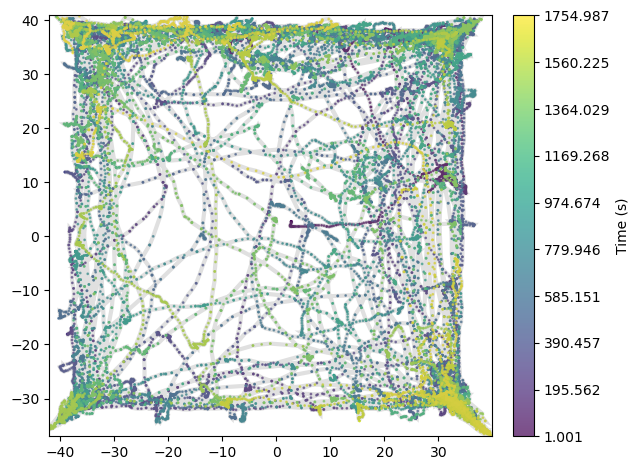

In [15]:
df = openFile('Trace_7.txt')
df = addFilteredV(df)

### Draft (после черновика будет векторное поле)

In [47]:
df

,time,x,y,Vx,Vy,V
0,1.001,2.771,2.771,-1.020664,0.000000,1.060714
1,1.034,2.771,2.771,-1.061949,0.000000,1.109922
2,1.068,2.771,2.771,-1.140741,0.000000,1.205239
3,1.101,2.771,2.698,-1.249830,-2.212121,1.340646
4,1.134,2.771,2.626,-1.378875,-2.181818,1.507519
...,...,...,...,...,...,...
52480,1754.853,-37.997,35.226,-7.165181,-13.242424,8.685303
52481,1754.886,-37.705,34.715,-7.519928,-15.484848,8.991229
52482,1754.920,-37.705,34.715,-7.821590,0.000000,9.241747
52483,1754.953,-37.632,34.205,-8.040699,-15.454545,9.418891


In [52]:
x_cut

0           [-1.057, 3.038)
1           [-1.057, 3.038)
2           [-1.057, 3.038)
3           [-1.057, 3.038)
4           [-1.057, 3.038)
                ...        
52480    [-42.008, -37.913)
52481    [-37.913, -33.818)
52482    [-37.913, -33.818)
52483    [-37.913, -33.818)
52484    [-37.913, -33.818)
Name: x, Length: 52485, dtype: category
Categories (20, interval[float64, left]): [[-42.008, -37.913) < [-37.913, -33.818) < [-33.818, -29.723) < [-29.723, -25.628) ... [23.513, 27.608) < [27.608, 31.703) < [31.703, 35.798) < [35.798, 39.893)]

In [55]:
dfn

time          x          y  \
x                  y                                                       
[-42.008, -37.913) [-36.976, -33.085)  1393.748154 -39.735592 -33.952953   
                   [-33.085, -29.194)  1189.942994 -38.589454 -31.986679   
                   [-29.194, -25.303)  1517.216000 -37.924000 -29.099000   
                   [-25.303, -21.413)   366.432739 -39.233565 -24.241478   
                   [-21.413, -17.522)   236.469538 -38.327923 -17.957846   
...                                            ...        ...        ...   
[35.798, 39.893)   [21.387, 25.278)     214.881333  35.809000  24.456333   
                   [25.278, 29.168)     814.914122  36.379951  26.386659   
                   [29.168, 33.059)            NaN        NaN        NaN   
                   [33.059, 36.95)     1053.969600  35.889300  33.606400   
                   [36.95, 40.841)      743.942297  36.264521  39.026762   

                                             Vx        Vy         V  
x                  y                                                 
[-42.008, -37.913) [-36.976, -33.085) -0.240445 -3.227159  8.772342  
                   [-33.085, -29.194) -0.239579  0.035211  7.869577  
                   [-29.194, -25.303)  0.326890  6.441176  4.214180  
                   [-25.303, -21.413) -1.816627 -1.639386  6.199469  
                   [-21.413, -17.522)  0.836837 -1.003634  5.675152  
...                                         ...       ...       ...  
[35.798, 39.893)   [21.387, 25.278)    1.198819  4.337493  6.276627  
                   [25.278, 29.168)   -0.901316 -0.792748  4.414209  
                   [29.168, 33.059)         NaN       NaN       NaN  
                   [33.059, 36.95)    -0.347930  0.006506  3.220425  
                   [36.95, 40.841)    -0.679561  0.225933  7.045738  

[400 rows x 6 columns]

In [58]:
print(df['Vx'].mean())

0.013525868078553603


In [64]:
dfvx

Vx                                        \
y                  [-36.976, -29.194) [-29.194, -21.413) [-21.413, -13.631)   
x                                                                             
[-42.008, -33.818)           0.056735           2.302335           6.737363   
[-33.818, -25.628)          -0.579547           0.694244          -4.341549   
[-25.628, -17.438)           0.007894           0.971818           2.284817   
[-17.438, -9.248)           -0.572950          -4.180377          -1.983606   
[-9.248, -1.057)            -0.048144          -0.962527          -9.989886   
[-1.057, 7.133)             -1.430029           0.168260           2.177460   
[7.133, 15.323)             -0.262698          -2.869928          -3.371897   
[15.323, 23.513)             0.471057           2.141794           4.069103   
[23.513, 31.703)            -0.009883           1.266203           5.823657   
[31.703, 39.893)            -0.175788          -2.633299         -12.837345   

                                                                     \
y                  [-13.631, -5.849) [-5.849, 1.933) [1.933, 9.714)   
x                                                                     
[-42.008, -33.818)         13.605416        3.282487       8.088729   
[-33.818, -25.628)         -3.838120        1.538067      -1.326689   
[-25.628, -17.438)         -6.672581       -0.534998      10.400380   
[-17.438, -9.248)          10.920366        0.617742       8.448124   
[-9.248, -1.057)           -5.097686       -3.302989      -3.587069   
[-1.057, 7.133)            -3.099931       -2.395923      -4.974538   
[7.133, 15.323)             5.194663       -1.228487      -2.652571   
[15.323, 23.513)            2.488817       -0.322764      -0.024386   
[23.513, 31.703)            0.723502        3.922978       6.718032   
[31.703, 39.893)           -5.568032       -7.883956      -2.519007   

                                                                      \
y                  [9.714, 17.496) [17.496, 25.278) [25.278, 33.059)   
x                                                                      
[-42.008, -33.818)        2.885702         3.312529         2.195467   
[-33.818, -25.628)       -3.459337        -2.202138        -0.278436   
[-25.628, -17.438)        1.345418         3.064508        -3.005304   
[-17.438, -9.248)         2.937399         4.752177         3.423753   
[-9.248, -1.057)         -2.877047         1.463654         0.244574   
[-1.057, 7.133)          -6.346352        -5.597155        -0.661680   
[7.133, 15.323)          -1.013654        -6.168381         1.010588   
[15.323, 23.513)         -0.425503        -1.642162         2.508837   
[23.513, 31.703)          2.161611         0.882436        -0.632742   
[31.703, 39.893)         -2.095807        -2.057626        -1.990739   

                                     
y                  [33.059, 40.841)  
x                                    
[-42.008, -33.818)         0.170478  
[-33.818, -25.628)         0.085791  
[-25.628, -17.438)        -0.143039  
[-17.438, -9.248)          0.487142  
[-9.248, -1.057)          -0.043377  
[-1.057, 7.133)            0.436324  
[7.133, 15.323)            0.089277  
[15.323, 23.513)           0.017585  
[23.513, 31.703)          -0.069140  
[31.703, 39.893)          -0.179612

In [69]:
dfvx.iloc[0][1]

2.302334995264591

In [66]:
dfvx

Vx                                        \
y                  [-36.976, -29.194) [-29.194, -21.413) [-21.413, -13.631)   
x                                                                             
[-42.008, -33.818)           0.056735           2.302335           6.737363   
[-33.818, -25.628)          -0.579547           0.694244          -4.341549   
[-25.628, -17.438)           0.007894           0.971818           2.284817   
[-17.438, -9.248)           -0.572950          -4.180377          -1.983606   
[-9.248, -1.057)            -0.048144          -0.962527          -9.989886   
[-1.057, 7.133)             -1.430029           0.168260           2.177460   
[7.133, 15.323)             -0.262698          -2.869928          -3.371897   
[15.323, 23.513)             0.471057           2.141794           4.069103   
[23.513, 31.703)            -0.009883           1.266203           5.823657   
[31.703, 39.893)            -0.175788          -2.633299         -12.837345   

                                                                     \
y                  [-13.631, -5.849) [-5.849, 1.933) [1.933, 9.714)   
x                                                                     
[-42.008, -33.818)         13.605416        3.282487       8.088729   
[-33.818, -25.628)         -3.838120        1.538067      -1.326689   
[-25.628, -17.438)         -6.672581       -0.534998      10.400380   
[-17.438, -9.248)          10.920366        0.617742       8.448124   
[-9.248, -1.057)           -5.097686       -3.302989      -3.587069   
[-1.057, 7.133)            -3.099931       -2.395923      -4.974538   
[7.133, 15.323)             5.194663       -1.228487      -2.652571   
[15.323, 23.513)            2.488817       -0.322764      -0.024386   
[23.513, 31.703)            0.723502        3.922978       6.718032   
[31.703, 39.893)           -5.568032       -7.883956      -2.519007   

                                                                      \
y                  [9.714, 17.496) [17.496, 25.278) [25.278, 33.059)   
x                                                                      
[-42.008, -33.818)        2.885702         3.312529         2.195467   
[-33.818, -25.628)       -3.459337        -2.202138        -0.278436   
[-25.628, -17.438)        1.345418         3.064508        -3.005304   
[-17.438, -9.248)         2.937399         4.752177         3.423753   
[-9.248, -1.057)         -2.877047         1.463654         0.244574   
[-1.057, 7.133)          -6.346352        -5.597155        -0.661680   
[7.133, 15.323)          -1.013654        -6.168381         1.010588   
[15.323, 23.513)         -0.425503        -1.642162         2.508837   
[23.513, 31.703)          2.161611         0.882436        -0.632742   
[31.703, 39.893)         -2.095807        -2.057626        -1.990739   

                                     
y                  [33.059, 40.841)  
x                                    
[-42.008, -33.818)         0.170478  
[-33.818, -25.628)         0.085791  
[-25.628, -17.438)        -0.143039  
[-17.438, -9.248)          0.487142  
[-9.248, -1.057)          -0.043377  
[-1.057, 7.133)            0.436324  
[7.133, 15.323)            0.089277  
[15.323, 23.513)           0.017585  
[23.513, 31.703)          -0.069140  
[31.703, 39.893)          -0.179612

In [78]:
Vectors

array([[[-4.20080000e+01, -3.69760000e+01,  5.67346903e-02,
         -8.29224675e-02],
        [-4.20080000e+01, -2.91943000e+01,  2.30233500e+00,
          1.81268077e+00],
        [-4.20080000e+01, -2.14126000e+01,  6.73736336e+00,
          6.68666840e+00],
        [-4.20080000e+01, -1.36309000e+01,  1.36054164e+01,
          1.38014260e+01],
        [-4.20080000e+01, -5.84920000e+00,  3.28248745e+00,
          3.53367434e+00],
        [-4.20080000e+01,  1.93250000e+00,  8.08872887e+00,
          8.34515691e+00],
        [-4.20080000e+01,  9.71420000e+00,  2.88570230e+00,
          2.56546268e+00],
        [-4.20080000e+01,  1.74959000e+01,  3.31252862e+00,
          3.27239089e+00],
        [-4.20080000e+01,  2.52776000e+01,  2.19546727e+00,
          2.38506190e+00],
        [-4.20080000e+01,  3.30593000e+01,  1.70478176e-01,
          2.25791358e-01]],

       [[-3.38179000e+01, -3.69760000e+01, -5.79547419e-01,
         -2.75052670e-01],
        [-3.38179000e+01, -2.91943000e+01

### Вот векторное поле!

(10, 10, 4)
0.05673469026851427 -0.08292246745755713 0.10047368157439972
2.302334995264591 1.8126807719130793 2.9302829234194094
6.737363357720922 6.686668402464964 9.492291574666462
13.60541643483646 13.801426024959033 19.380059769973222
3.282487454943325 3.533674339299856 4.823025837385342
8.088728873854887 8.345156911810596 11.62192663362981
2.88570230302701 2.565462684058038 3.8612014406127093
3.3125286173026605 3.272390891841933 4.656327736474219
2.195467265288812 2.3850618993909896 3.2416965892694662
0.17047817622894162 0.22579135849060009 0.2829214487086067
-0.5795474185859768 -0.27505267013365176 0.641505402734319
0.69424440390225 1.0992355241225773 1.3001130834825976
-4.341549001368208 -4.328764111700591 6.130843862473443
-3.8381202437905104 -3.082434249622713 4.922658622029529
1.538067049517498 0.3728817587607152 1.5826215766341447
-1.326689491258604 -1.0791509870002904 1.7101672020477163
-3.4593369643049647 -3.4524768380964055 4.887392817259407
-2.2021376919011786 -1.7863573

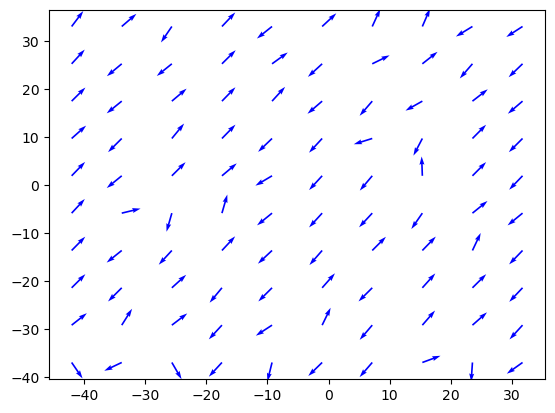

In [17]:
n=10
if True:
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min(), df["x"].max(), n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    print(Vectors.shape)
    for i in Vectors:
        for j in i:
            l = pow((pow(j[2], 2) + pow(j[3], 2)), 0.5)
            print(j[2], j[3], l)
            plt.quiver(j[0], j[1], j[2], j[3], color='b', units='xy', scale=l/3.5, width=0.3)
    # Show plot with grid
    #plt.grid()
    plt.show()
            

### снова черновик

In [18]:
if True:
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min(), df["x"].max(), n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfn = pd.DataFrame(dfn.loc[:, 'curl'])
    dfn = dfn.unstack()
    #зашьем в керл минмакс
    dfn = minmax(dfn)
    #заменим nan на 0
    dfn = dfn.fillna(0)
    sns.heatmap(dfn, square=True, xticklabels=False, yticklabels=False)

KeyError: 'curl'

In [48]:
def VelocityMap(df, n):
    #делаем индексы с 0 без пропусков
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min(), df["x"].max(), n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfn = pd.DataFrame(dfn.loc[:, 'curl'])
    dfn = dfn.unstack()
    #зашьем в керл минмакс
    dfn = minmax(dfn)
    #заменим nan на 0
    dfn = dfn.fillna(0)
    sns.heatmap(dfn, square=True, xticklabels=False, yticklabels=False)
    return dfn

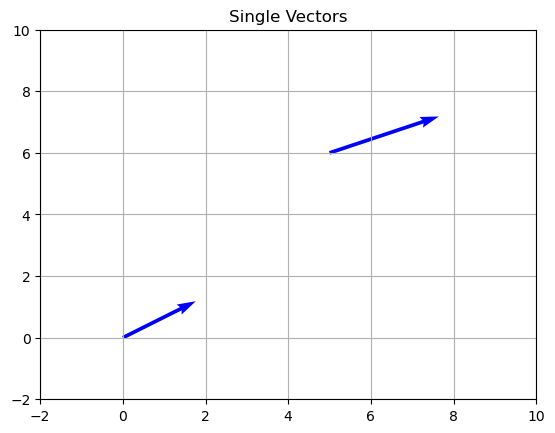

In [46]:
 
# Vector origin location
X = [0]
Y = [0]
  
# Directional vectors
U = [2]  
V = [1]  
  
# Creating plot
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1)
plt.quiver(5, 6, 3, 1, color='b', units='xy', scale=1)
plt.title('Single Vectors')
  
# x-lim and y-lim
plt.xlim(-2, 10)
plt.ylim(-2, 10)
  
# Show plot with grid
plt.grid()
plt.show()

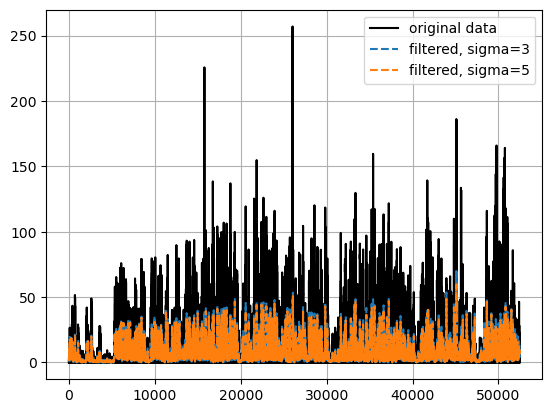

In [25]:
v = df['V']
v3 = gaussian_filter1d(v, 3)
v5 = gaussian_filter1d(v, 5)
plt.plot(v, 'k', label='original data')
plt.plot(v3, '--', label='filtered, sigma=3')
plt.plot(v5, '--', label='filtered, sigma=5')
plt.legend()
plt.grid()
plt.show()

In [27]:
v5 = pd.Series(v5)
v5

0        1.060714
1        1.109922
2        1.205239
3        1.340646
4        1.507519
           ...   
52480    8.685303
52481    8.991229
52482    9.241747
52483    9.418891
52484    9.510554
Length: 52485, dtype: float64

In [30]:
df['V'] = v5
df

,time,x,y,Vx,Vy,V
0,1.001,2.771,2.771,0.000000,0.000000,1.060714
1,1.034,2.771,2.771,0.000000,0.000000,1.109922
2,1.068,2.771,2.771,0.000000,0.000000,1.205239
3,1.101,2.771,2.698,0.000000,-2.212121,1.340646
4,1.134,2.771,2.626,0.000000,-2.181818,1.507519
...,...,...,...,...,...,...
52480,1754.853,-37.997,35.226,8.848485,-13.242424,8.685303
52481,1754.886,-37.705,34.715,8.848485,-15.484848,8.991229
52482,1754.920,-37.705,34.715,0.000000,0.000000,9.241747
52483,1754.953,-37.632,34.205,2.212121,-15.454545,9.418891


### Not needed

In [15]:
x = df['x']
x.plot()
xx = savgol_filter(x, 21, 10)
#plt.figure()
plt.plot(xx)

21 0
21 1
21 2
21 3
21 4
21 5
21 6
21 7
21 8
21 9
21 10
21 11
21 12
21 13
21 14
21 15
21 16
21 17
21 18
21 19
23 0
23 1
23 2
23 3
23 4
23 5
23 6
23 7
23 8


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarn

23 9
23 10
23 11
23 12
23 13
23 14
23 15
23 16
23 17
23 18
23 19
23 20
23 21
25 0
25 1
25 2
25 3
25 4
25 5
25 6
25 7
25 8
25 9
25 10
25 11
25 12
25 13
25 14
25 15
25 16
25 17
25 18
25 19
25 20
25 21
25 22
25 23
27 0
27 1
27 2
27 3
27 4
27 5
27 6
27 7
27 8
27 9
27 10
27 11
27 12
27 13
27 14
27 15
27 16
27 17
27 18
27 19


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarn

27 20
27 21
27 22
27 23
27 24
27 25
29 0
29 1
29 2
29 3
29 4
29 5
29 6
29 7
29 8
29 9
29 10
29 11
29 12
29 13
29 14
29 15
29 16
29 17
29 18


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarn

29 19
29 20
29 21
29 22
29 23
29 24
29 25
29 26
29 27


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:221: RankWarn

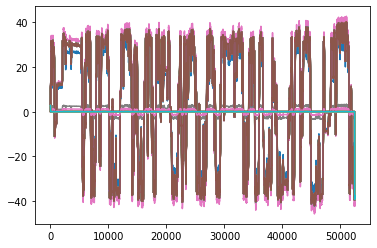

In [13]:
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.
x = df['x']
for i in range(21, 31, 2):
    for j in range(i-1):
        print(i, j)
        xx = savgol_filter(x, i, j)
        #plt.figure()
        plt.plot(xx)

In [73]:
#x = x.to_numpy()
savgol_filter(x, 21, 4)

array([  2.73,   2.78,   2.81, ..., -37.69, -37.61, -37.62])

In [44]:
def curlMap(df, n):
    #делаем индексы с 0 без пропусков
    ind = range(0, len(df))
    df = df.reindex(ind)
    vx = []
    vy = []
    curl = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            curl.append(0)
        elif (df['x'][i]-df['x'][i-1])==0 or (df['y'][i]-df['y'][i-1])==0:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vx.append(vvx)
            vy.append(vvy)
            curl.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vx.append(vvx)
            vy.append(vvy)
            curl.append(vvy/dx - vvx/dy)
    
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "curl", curl)
    binx = np.linspace(df["x"].min(), df["x"].max(), n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfn = pd.DataFrame(dfn.loc[:, 'curl'])
    dfn = dfn.unstack()
    #зашьем в керл минмакс
    dfn = minmax(dfn)
    #заменим nan на 0
    dfn = dfn.fillna(0)
    sns.heatmap(dfn, square=True, xticklabels=False, yticklabels=False)
    return dfn

In [57]:
%matplotlib inline